# Modelo del rendimiento de una cuenta de ahorro

<img style="center" src="https://static.pexels.com/photos/9660/business-money-pink-coins.jpg" width="500px" height="200px" alt="atom"/>

> **¿Tiene el dinero el mismo valor a lo largo del tiempo?** La respuesta es *no*. Todos lo hemos vivido. 

> Dos situaciones básicas:
1. <font color=blue>Inflación</font>: ¿Cuánto dinero necesitabas para comprar unas papas y un refresco hace 10 años? ¿Cuánto necesitas hoy?
2. <font color=blue>Interés</font>: no es lo mismo tener $\$10000$ MXN disponibles hoy a recibir $\$10000$ MXN en un año, pues los primeros pueden ser invertidos en un negocio o una cuenta bancaria para generar **interés**. Por lo tanto los $\$10000$ MXN disponibles hoy valen más que los $\$10000$ MXN que se recibirán en un año.

Referencia:
- Vidaurri Aguirre, Héctor Manuel. *Ingeniería económica básica*, ISBN: 978-607-519-017-4. (Disponible en biblioteca)

Referencias:
- http://www.sympy.org
- http://matplotlib.org
- http://www.numpy.org
- http://ipywidgets.readthedocs.io/en/latest/index.html

___
## Interés
Nos centraremos en como cambia el valor del dinero en el tiempo debido al **interés**. Existen dos tipos:

### Capitalización por interés simple
Este tipo de interés se calcula <font color=red>única y exclusivamente sobre la cantidad original que se invirtió</font>. Como consecuencia, el interés generado no forma parte del dinero que se invierte, es decir, los <font color=blue>intereses no ganan intereses</font>.

Suponga que se tiene un capital inicial $C_0$ y se invierte a un plazo de $k$ periodos (pueden ser meses, trimestres, semestres, años...) a una tasa de **interés simple** por periodo $i$. Al final del primer periodo, el capital $C_1$ que se obtiene es:

$$C_1=C_0+iC_0=C_0(1+i).$$

De la misma manera, como el interés solo se calcula sobre el capital inicial, al final del segundo periodo, el capital $C_2$ que se obtiene es:

$$C_2=C_1+iC_0=C_0+iC_0+iC_0=C_0(1+2i).$$

Así, al final del $k-$ésimo periodo, el capital $C_k$ que se obtiene es:

$$C_k=C_{k-1}+iC_0=C_0+kiC_0=C_0(1+ki).$$

> **Ejemplo.** Suponga que se tiene un capital de $\$10000$ MXN, el cual se pone en un fondo de inversión que paga una tasa de interés simple del $0.8\%$ mensual. 

> Si se tiene una meta de ahorro de $\$11000$ MXN sin inversiones adicionales, ¿cuántos meses se debería dejar invertido el dinero?

In [5]:
# Importar librería numpy
import numpy as np

# Datos del problema
C0 = 10000
i = 0.8/100
Cf = 11000

# Despejar k tal que C_k=meta
k = ((Cf/C0)-1)/i
k = np.ceil(k)
k = int(k)

Ck = C0*(1+k*i)
Ck = np.round(Ck,2)

# Imprimimos respuesta en pantalla
print(f"Es necesario invertir el dinero {k} períodos. Después de {k} períodos la cantidad de dinero que se tendrá es {Ck}")

Es necesario invertir el dinero 13 períodos. Después de 13 períodos la cantidad de dinero que se tendrá es 11040.0


> <font color=blue>**Actividad.**</font>
1. ¿Qué pasa si el interés no es del $0.8\%$ mensual sino del $1\%$ mensual?
2. ¿Qué pasa si la meta no son $\$11000$ MXN si no $\$12000$ MXN?

In [6]:
# Solución 1
# Datos del problema
C0 = 10000
i = 1/100
Cf = 11000

# Despejar k tal que C_k=meta
k = ((Cf/C0)-1)/i
k = np.ceil(k)
k = int(k)

Ck = C0*(1+k*i)
Ck = np.round(Ck,2)

# Imprimimos respuesta en pantalla
print(f"Es necesario invertir el dinero {k} períodos. Después de {k} períodos la cantidad de dinero que se tendrá es {Ck}")


Es necesario invertir el dinero 11 períodos. Después de 11 períodos la cantidad de dinero que se tendrá es 11100.0


In [8]:
# Solución 2
# Datos del problema
C0 = 10000
i = 1/100
Cf = 12000

# Despejar k tal que C_k=meta
k = ((Cf/C0)-1)/i
k = np.ceil(k)
k = int(k)

Ck = C0*(1+k*i)
Ck = np.round(Ck,2)

# Imprimimos respuesta en pantalla
print(f"Es necesario invertir el dinero {k} períodos. Después de {k} períodos la cantidad de dinero que se tendrá es {Ck}")

Es necesario invertir el dinero 20 períodos. Después de 20 períodos la cantidad de dinero que se tendrá es 12000.0


> Una gráfica que nos permite ilustrar la situación anterior se puede realizar de la siguiente manera.

Si no se ejecuta, correr desde anaconda prompt cada de una de las siguientes líneas:

    conda install ipywidgets
    jupyter nbextension enable --py widgetsnbextension --sys-prefix
    

In [9]:
# Librerías para gráficos
import matplotlib.pyplot as plt
# Librería para widgets de jupyter
from ipywidgets import *

def interes_simple(C_0, meta, i):
    # Despejamos k
    k = np.ceil((meta/C_0 - 1)/i)           # Notar el uso de la función ceil
    k = k.astype(int)                       # Conversión a entero
    C_k = C_0*(1+k*i)                       # Cálculo del capital al final del periodo k
    C_k = round(C_k, 2)                     # Redondeo con dos cifras decimales
    # Vector de periodos
    kk = np.linspace(0,k,k+1)               
    # Vector de capitales por periodo
    CC = C_0*(1+kk*i)
    # Gráfico
    plt.figure(num=1); plt.clf()            # Figura 1, borrar lo que contenga
    plt.plot(kk, CC,'*',ms=10)              # Se grafica la evolución de los capitales
    plt.plot(kk,meta*np.ones(k+1),'--k')    # Se grafica la meta
    plt.xlabel('$k$',fontsize=18)                         # Etiqueta eje x
    plt.ylabel('$C_k$',fontsize=18)                       # Etiqueta eje y
    plt.grid(True)                          # Malla en la gráfica
    plt.show()                              # Mostrar la figura
    print("El número de periodos que se debe dejar invertido el dinero para llegar a la meta de ", meta," es ", k,
          ". Al final del periodo ", k,", el capital es ", C_k, ".", sep="")

In [11]:
interact_manual(interes_simple, C_0=fixed(23000), meta=(30000,40000,500), i=fixed(0.008));

interactive(children=(IntSlider(value=35000, description='meta', max=40000, min=30000, step=500), Button(descr…

Como se esperaba, el capital en el $k-$ésimo periodo $C_k=C_0(1+ki)$ crece linealmente con $k$.

### Capitalización por interés compuesto
El capital que genera el interés simple permanece constante todo el tiempo de duración de la inversión. En cambio, el que produce el interés compuesto en un periodo se <font color=red>convierte en capital en el siguiente periodo</font>. Esto es, el interés generado al final de un periodo <font color=blue>se reinvierte para el siguiente periodo para también producir interés</font>.

Suponga que se tiene un capital inicial $C_0$, y se va a ceder el uso de este capital por un periodo de tiempo determinado a una tasa de interés $i$. El capital que se obtiene al final del primer periodo $C_1$ se puede calcular por

$$C_1=C_0(1+i).$$ 

Si la anterior suma se vuelve a ceder a la misma tasa de interés, al final del periodo dos el capital $C_2$ es 

$$C_2=C_1(1+i)=C_0(1+i)^2.$$

Si se repite el anterior proceso $k$ veces, el capital al final del $k-$ésimo periodo $C_k$ es 

$$C_k=C_{k-1}(1+i)=C_0(1+i)^k.$$

**Referencia**:
- https://es.wikipedia.org/wiki/Inter%C3%A9s_compuesto.

> **Ejemplo.** Suponga que se tiene un capital de $\$10000$ MXN, el cual se pone en un fondo de inversión que paga una tasa de interés compuesto del $0.8\%$ mensual. 

> Si se tiene una meta de ahorro de $\$11000$ MXN sin inversiones adicionales, ¿cuántos meses se debería dejar invertido el dinero?

In [17]:
# Datos del problema
C0 = 10000
Cf = 12000
i = 1/100

# Calcular la cantidad de períodos
k = np.log(Cf/C0)/np.log(1+i)
k = np.ceil(k)
k = int(k)

Ck = C0*(1+i)**k
Ck = round(Ck,2)

# Imprimir el resultado
print(f"Es necesario invertir el dinero {k} períodos. Después de {k} períodos la cantidad de dinero que se tendrá es {Ck}")

Es necesario invertir el dinero 19 períodos. Después de 19 períodos la cantidad de dinero que se tendrá es 12081.09


> Una gráfica que nos permite ilustrar la situación anterior se puede realizar de la siguiente manera.

In [18]:
def interes_compuesto(C_0, meta, i):
    # Despejamos k
    k = np.ceil(np.log(meta/C_0)/np.log(1+i))
    k = k.astype(int)
    C_k = C_0*(1+i)**k                      # Cálculo del capital al final del periodo k
    C_k = round(C_k,2)
    # Vector de periodos
    kk = np.linspace(0,k,k+1)
    # Vector de capitales por periodo
    CC = C_0*(1+i)**kk
    # Gráfico
    plt.figure(num=1); plt.clf()            # Figura 1, borrar lo que contenga
    plt.plot(kk, CC,'*',linewidth=3.0)      # Se grafica la evolución de los capitales
    plt.plot(kk,meta*np.ones(k+1),'--k')    # Se grafica la meta
    plt.xlabel('$k$',fontsize=18)                         # Etiqueta eje x
    plt.ylabel('$C_k$',fontsize=18)                       # Etiqueta eje y
    plt.grid(True)                          # Malla en la gráfica
    plt.show()                              # Mostrar la figura
    print("El número de periodos que se debe dejar invertido el dinero para llegar a la meta de ", meta," es ", k,
          ". Al final del periodo ", k,", el capital es ", C_k, ".", sep="")
 

In [21]:
interact_manual(interes_compuesto, C_0=fixed(10000), meta=(11000,40000,100), i=fixed(0.008));

interactive(children=(IntSlider(value=25500, description='meta', max=40000, min=11000, step=100), Button(descr…

El capital en el $k-$ésimo periodo $C_k=C_0(1+i)^k$ crece de manera exponencial con $k$.

> <font color=blue>**Actividad.**</font>
> - Modificar el código anterior para dejar fija la meta de ahorro y variar la tasa de interés compuesta.

In [26]:
interact_manual(interes_compuesto, C_0=fixed(10000), meta=fixed(40000), i=(0.01, 0.09,0.01));

interactive(children=(FloatSlider(value=0.05, description='i', max=0.09, min=0.01, step=0.01), Button(descript…

___
## Tabla de abonos
Como aplicación importante del concepto de interés compuesto se encuentra la creación de un modelo de cuenta de ahorro.

Referencia:
- Vidaurri Aguirre, Héctor Manuel. *Ingeniería económica básica*, ISBN: 978-607-519-017-4. (Disponible en biblioteca)
- http://pbpython.com/amortization-model.html
- https://pbpython.com/amortization-model-revised.html

In [48]:
# Librería de análisis de datos
import pandas as pd

# Librería para manipulación de fechas
from datetime import date

In [62]:
# Datos para la cuenta de ahorro
inicial = 2000
tasa_interes = 8/100
meta = 50000

years = 3
abono_year = 12

fecha_inicio = date(2021,5,10)

In [63]:
# Tasa de interés mensual
i = tasa_interes/12

# Cantidad total de períodos
T = years*abono_year

In [64]:
# Cálculo de abonos mensuales iguales para llegar a la meta de ahorro en el tiempo deseado
abono = i*(meta - inicial*(1+i)**T)/((1+i)**T-1)
abono

1170.8122088153607

In [65]:
# Rango de fechas en la tabla
rng = pd.date_range(fecha_inicio, periods=T, freq='MS')
rng.name = "Fecha del abono"

# Columnas de abonos y extracto de cuenta en las fechas respectivas
tabla = pd.DataFrame(index=rng, columns=['Abono', 'Balance'], dtype='float')

# Para poner el indice con los periodos y no con las fechas
tabla.reset_index(inplace=True)
tabla.index+=1
tabla.index.name = 'Períodos'

In [66]:
# Los abonos son iguales
tabla['Abono'] = abono

# Calcular el balance para el primer período
tabla.loc[1,'Balance'] = tabla.loc[1,'Abono'] + inicial*(1+i)**1

# Calcular el balance para el resto de períodos
for n in range(2,len(tabla)+1):

    # Balance del período anterior
    prev_balance = tabla.loc[n-1,'Balance']
    
    # Balance del período actual
    tabla.loc[n,'Balance'] = prev_balance*(1+i)**1 + tabla.loc[n,'Abono'] 

In [67]:
# Redondear con dos cifras decimales y mostrar DataFrame
tabla = tabla.round(2)
tabla

,Fecha del abono,Abono,Balance
Períodos,,,
1,2021-06-01,1170.81,3184.15
2,2021-07-01,1170.81,4376.19
3,2021-08-01,1170.81,5576.17
4,2021-09-01,1170.81,6784.16
5,2021-10-01,1170.81,8000.20
6,2021-11-01,1170.81,9224.35
7,2021-12-01,1170.81,10456.65
8,2022-01-01,1170.81,11697.18
9,2022-02-01,1170.81,12945.97


<AxesSubplot:xlabel='Períodos'>

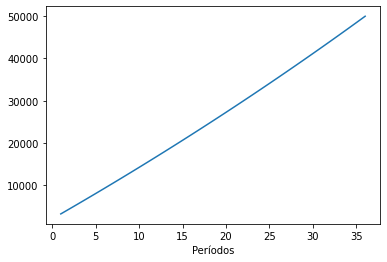

In [69]:
tabla['Balance'].plot()

In [68]:
tabla['Abono'].sum()

42149.15999999999

## Tarea.
> - Consultar tasas de interés reales en algún banco y proyectar un ahorro mensual para que al terminar su carrera tengan $\$120000$ MXN en su cuenta.
> - Hacer esto en un nuevo archivo, llamarlo T8NombreApellido.ipynb y subirlo a moodle.
> - Plazo: Miércoles 12 de Mayo 8:55 am

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>